# Regression with scikit-learn

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') # style used

In [2]:
# load datasets
path = 'data/csv/boston.csv'
boston_df = pd.read_csv(path)

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [5]:
boston_df.shape

(506, 14)

In [6]:
# predicting boston house value in col MEDV
boston_df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Creating feature and target data

In [7]:
X = boston_df.drop('MEDV', axis=1).values # features
y = boston_df['MEDV'].values 

In [8]:
# try to predict house value with one feature
X_rm = X[:,5]

In [9]:
# reshaping X_rm and y ndarray
y = y.reshape(-1, 1)
X_rm = X_rm.reshape(-1, 1)

## Single Linear Regression of House value vs number of room

Text(0, 0.5, 'House Value')

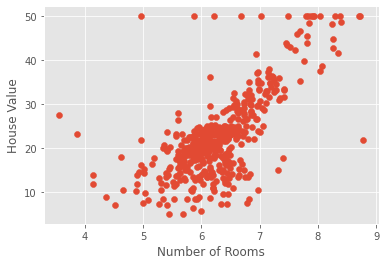

In [10]:
plt.scatter(X_rm, y)
plt.xlabel('Number of Rooms')
plt.ylabel('House Value')

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

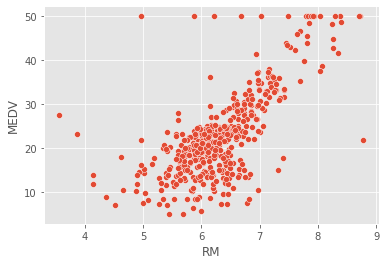

In [11]:
sns.scatterplot(x=boston_df['RM'], y=boston_df['MEDV'])

## Fitting a regression model

In [12]:
# library
from sklearn.linear_model import LinearRegression

In [13]:
linreg = LinearRegression()

In [14]:
linreg.fit(X_rm, y)
prediction_space = np.linspace(min(X_rm), max(X_rm)).reshape(-1, 1)

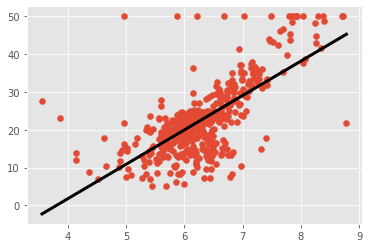

In [15]:
plt.scatter(X_rm, y)
plt.plot(prediction_space, linreg.predict(prediction_space), color='black', linewidth=3)

In [16]:
y_pred = linreg.predict(prediction_space)
print(linreg.score(X_rm, y))

0.4835254559913341


# Linear Regression from all features

y = ax + b
- y = target
- x = single feature
- a, b = parameters

OLS = Calculate loss function to minimize sum of squares of residuals
- fit method perfoms OLS

In [17]:
# import library
from sklearn.model_selection import train_test_split

# separate data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
# training and predicting Linear regression
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred = multi_reg.predict(X_test)

In [19]:
# Regression score
multi_reg.score(X_test, y_test) # 71 percent

0.7112260057484913

In [20]:
# mean squared error
from sklearn.metrics import mean_squared_error

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4.6386899261728365


## Cross-validation

In [22]:
# import library
from sklearn.model_selection import cross_val_score

In [23]:
reg = LinearRegression()

In [36]:
# make a cross validation results
cv_results = cross_val_score(reg, X, y, cv=5)

In [37]:
print(cv_results)
np.mean(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


0.3532759243958831

## Regularized regression with Ridge Regression

In [38]:
# import library
from sklearn.linear_model import Ridge

In [39]:
# separate data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# make ridge regression
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127318

## Lasso Regression
- Can be used for features selection
- Shrinks the coeff of less important features down to 0

In [40]:
# import library
from sklearn.linear_model import Lasso

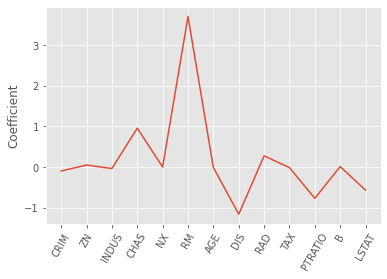

In [44]:
# Select feature/column names from df besides TARGET/MEDV
col_names = boston_df.drop('MEDV', axis=1).columns

# make lasso regression
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(col_names)), lasso_coef)
_ = plt.xticks(range(len(col_names)), col_names, rotation=60)
_ = plt.ylabel('Coefficient')
plt.show()